In [1]:
print("Hello; World")

Hello; World


In [2]:
def power_law(x, a, p):
    # After the declaration, use tabs to define the function internals
    # We use * for multiplication, and ** for exponentiation
    my_result = a * x**p
    return my_result


a_test = 4
p_test = 2
print(power_law(10, a=a_test, p=p_test), power_law(2, a_test, p_test))

400 16


In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
x_sparse = np.array([0, 2, 5, 7, 10])
x_dense = np.linspace(0, 10, 100)

In [5]:
y_sparse = power_law(x_sparse, a_test, p_test)
y_dense = power_law(x_dense, a_test, p_test)
print(y_sparse.shape)
print(y_dense.shape)

(5,)
(100,)


Text(0, 0.5, 'Current [mA]')

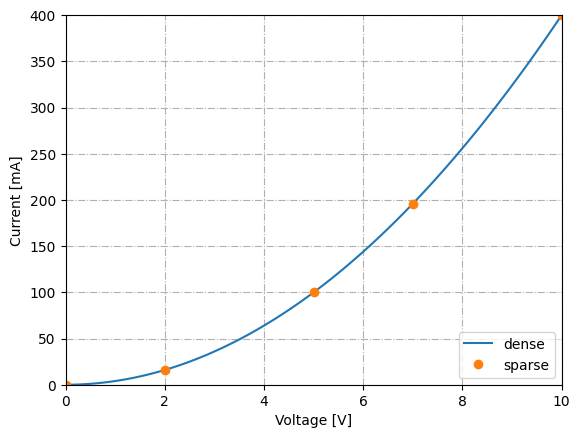

In [6]:
plt.plot(x_dense, y_dense, label="dense")
plt.plot(x_sparse, y_sparse, "o", label="sparse")
plt.legend(loc="lower right")
plt.xlim(left=0, right=10)
plt.ylim(bottom=0, top=400)
plt.grid(True, ls="-.")
plt.xlabel("Voltage [V]")
plt.ylabel("Current [mA]")

In [7]:
import pandas as pd

df_current = pd.read_csv("ezfit/data/current_data.csv")
df_voltage = pd.read_csv("ezfit/data/voltage_data.csv")

In [8]:
display(df_current.head())
display(df_voltage.head())

time   current
0   0.2  0.980067
1   0.7  0.764842
2   1.2  0.362358
3   1.7 -0.128844
4   2.2 -0.588501

time   voltage
0   0.0  0.000000
1   0.5  0.479426
2   1.0  0.841471
3   1.5  0.997495
4   2.0  0.909297

In [9]:
# To select a column use df[“column_name”]
common_t = df_voltage["time"]  # this is like a pointer if you are familiar
# new_data = np.interp(new_domain, old_domain, old_data)
common_current = np.interp(common_t, df_current["time"], df_current["current"])
df_current_interp = pd.DataFrame(
    {  # use new lines to keep things readable
        "time": common_t,  # if you are wrapped in () you
        "current": common_current,  # are good to make new lines!
    }
)

In [10]:
df_merged = pd.merge(df_voltage, df_current_interp, on="time")
df_merged["power"] = df_merged["current"] * df_merged["voltage"]

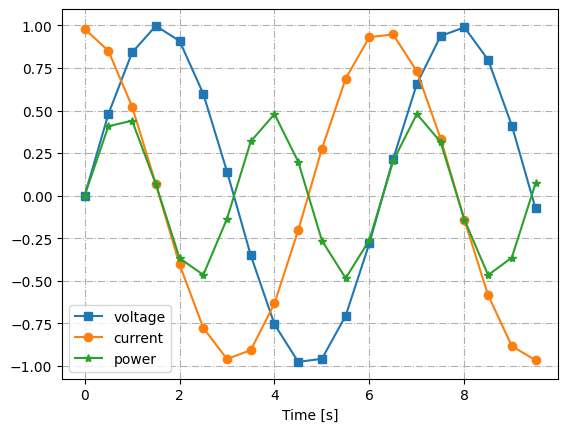

In [11]:
df_merged.plot(x="time", style=["s-", "o-", "*-"])
plt.xlabel("Time [s]")
plt.grid(True, ls="-.")

In [83]:
df_data = pd.read_csv("ezfit/data/powerlaw.csv")

<Axes: xlabel='x'>

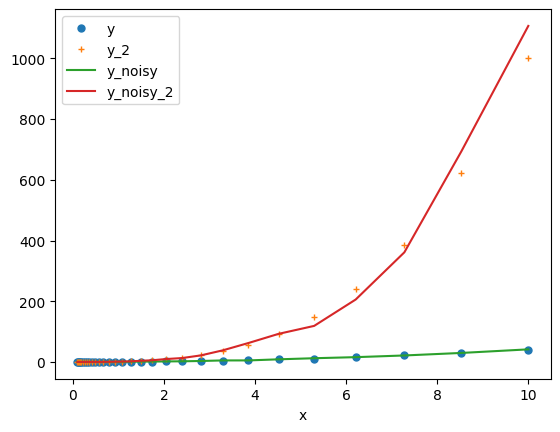

In [84]:
df_data.plot(x="x", style=["o", "+"], ms=5)

Text(0, 0.5, 'Current [mA]')

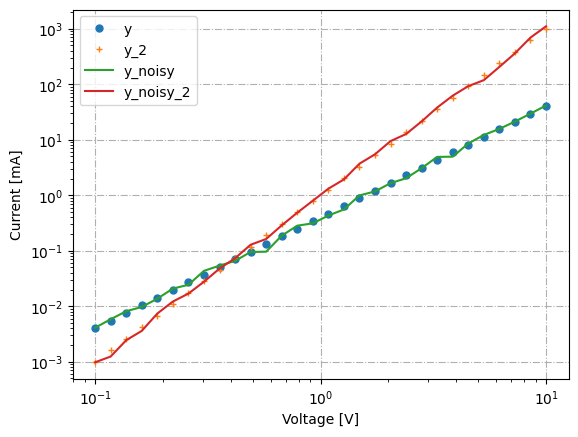

In [85]:
df_data.plot(x="x", style=["o", "+"], ms=5, loglog=True)
plt.grid(True, ls="-.")
plt.xlabel("Voltage [V]")
plt.ylabel("Current [mA]")

Text(0.5, 0, 'Log Voltage [log(V)]')

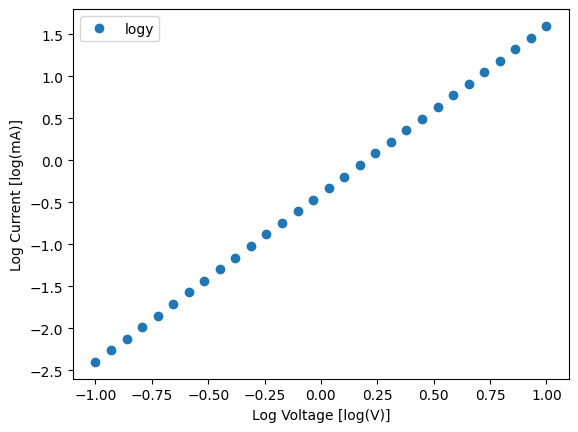

In [86]:
df_data["logx"] = np.log10(df_data["x"])
df_data["logy"] = np.log10(df_data["y"])
df_data.plot(x="logx", y="logy", style="o")
plt.ylabel("Log Current [log(mA)]")
plt.xlabel("Log Voltage [log(V)]")

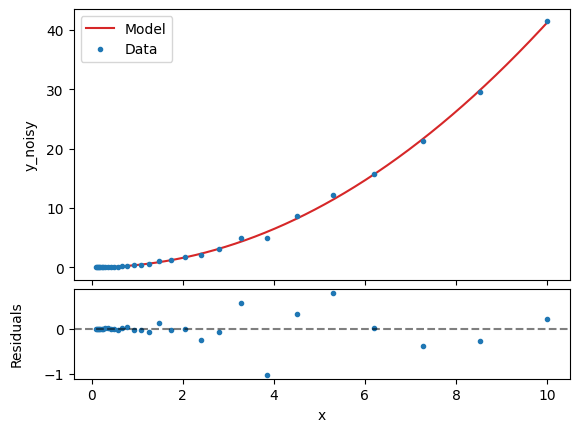

In [87]:
fit_results, *_ = df_data.fit(
    power_law,
    x="x",
    y="y_noisy",
    a={"value": 0.4},
    b={"value": 2},
)

In [88]:
print(fit_results)

power_law
a : (value = 0.39 ± 0.017, bounds = (-inf, inf))
p : (value = 2.02 ± 0.021, bounds = (-inf, inf))
𝜒2: inf
reduced 𝜒2: inf
covariance:
[[ 0.0003 -0.0003]
 [-0.0003  0.0004]]
correlation:
[[ 1.     -0.9936]
 [-0.9936  1.    ]]


In [89]:
s = "".join([f"{n}: {p.value:.2f}\n" for n, p in fit_results.params.items()])
s

'a: 0.39\np: 2.02\n'

Text(0.5, 300, 'a: 0.39\np: 2.02\n')

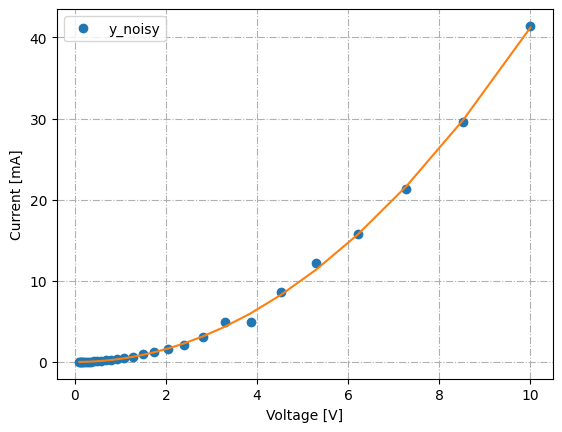

In [90]:
df_data.plot(x="x", y="y_noisy", style="o")
plt.plot(df_data["x"], fit_results(df_data["x"]))
plt.grid(True, ls="-.")
plt.xlabel("Voltage [V]")
plt.ylabel("Current [mA]")
s = "".join([f"{n}: {p.value:.2f}\n" for n, p in fit_results.params.items()])
plt.annotate(s, (0.5, 300))

In [91]:
print(fit_results)

power_law
a : (value = 0.39 ± 0.017, bounds = (-inf, inf))
p : (value = 2.02 ± 0.021, bounds = (-inf, inf))
𝜒2: inf
reduced 𝜒2: inf
covariance:
[[ 0.0003 -0.0003]
 [-0.0003  0.0004]]
correlation:
[[ 1.     -0.9936]
 [-0.9936  1.    ]]


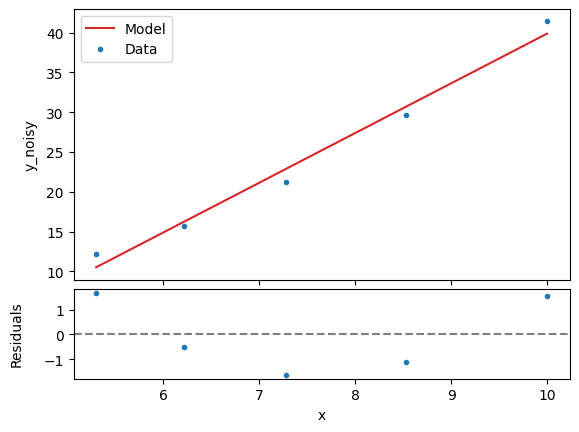

In [92]:
def line(x, m, b):
    return m * x + b


line_results, *_ = df_data.query("x>5").fit(
    line,
    x="x",
    y="y_noisy",
)

Text(0.5, 200, 'm: 6.25\nb: -22.58\n')

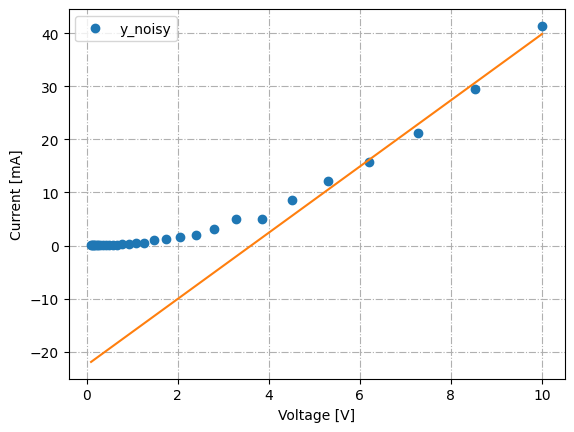

In [93]:
df_data.plot(x="x", y="y_noisy", style="o")
plt.plot(df_data["x"], line_results(df_data["x"]))
plt.grid(True, ls="-.")
plt.xlabel("Voltage [V]")
plt.ylabel("Current [mA]")
s = "".join([f"{n}: {p.value:.2f}\n" for n, p in line_results.params.items()])
plt.annotate(s, (0.5, 200))

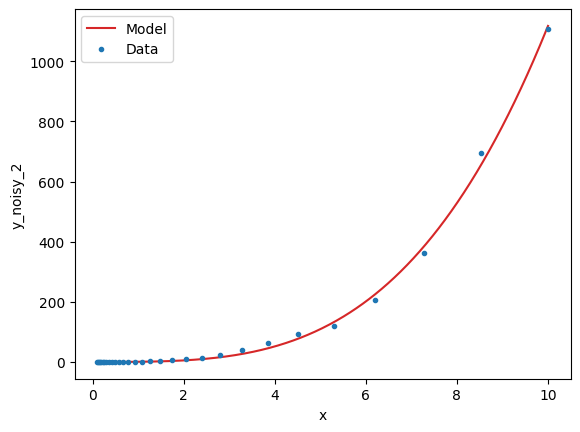

In [97]:
fit_results2, *_ = df_data.fit(power_law, x="x", y="y_noisy_2", residuals="none")

In [98]:
fit_results2

power_law
a : (value = 0.49 ± 0.062, bounds = (-inf, inf))
p : (value = 3.36 ± 0.057, bounds = (-inf, inf))
𝜒2: inf
reduced 𝜒2: inf
covariance:
[[ 0.0038 -0.0035]
 [-0.0035  0.0032]]
correlation:
[[ 1.    -0.998]
 [-0.998  1.   ]]

In [96]:
(3 - 3.36) / 0.06

-5.999999999999998

Text(0, 0.5, 'Current [mA]')

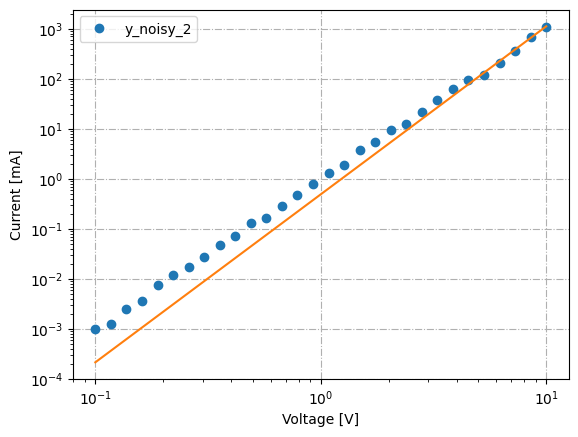

In [100]:
df_data.plot(x="x", y="y_noisy_2", style="o", loglog=True)
plt.plot(df_data["x"], fit_results2(df_data["x"]))
plt.grid(True, ls="-.")
plt.xlabel("Voltage [V]")
plt.ylabel("Current [mA]")

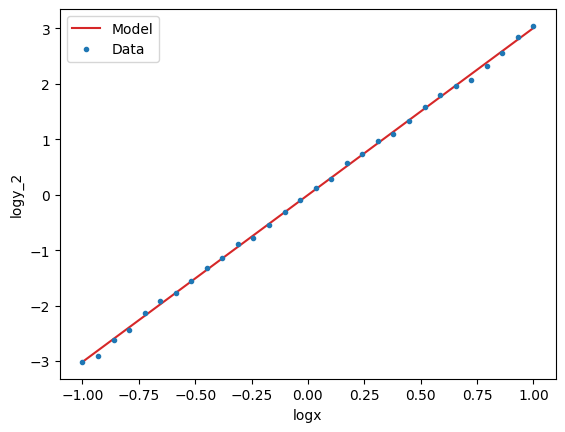

In [102]:
df_data["logy_2"] = np.log10(df_data["y_noisy_2"])
fit_results_linear, *_ = df_data.fit(line, x="logx", y="logy_2", residuals="none")

In [105]:
fit_results_linear

line
m : (value = 3.01 ± 0.014, bounds = (-inf, inf))
b : (value = -0.005 ± 0.0081, bounds = (-inf, inf))
𝜒2: inf
reduced 𝜒2: inf
covariance:
[[ 0.0002 -0.    ]
 [-0.      0.0001]]
correlation:
[[ 1. -0.]
 [-0.  1.]]

Text(0, 0.5, 'Current [mA]')

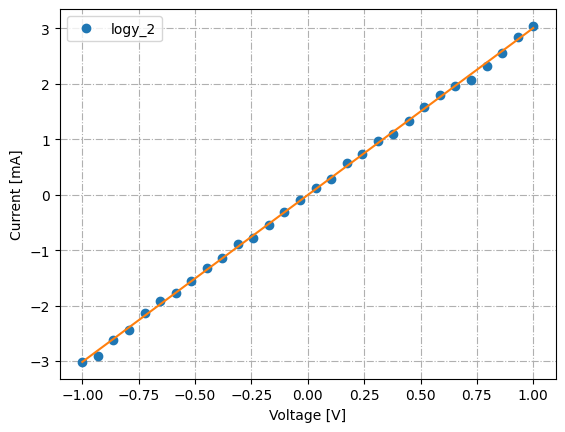

In [104]:
df_data.plot(x="logx", y="logy_2", style="o")
plt.plot(df_data["logx"], fit_results_linear(df_data["logx"]))
plt.grid(True, ls="-.")
plt.xlabel("Voltage [V]")
plt.ylabel("Current [mA]")

Text(0, 0.5, 'Current [mA]')

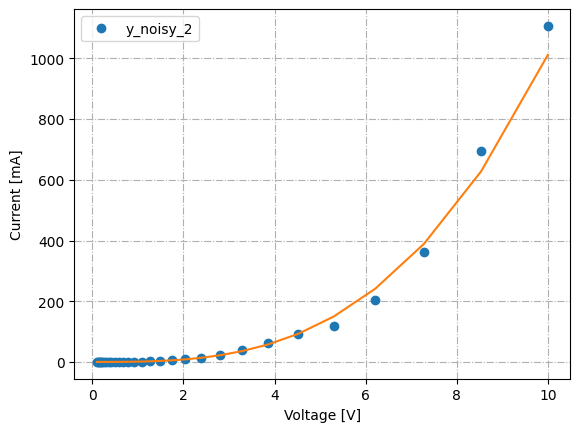

In [111]:
p_new = 3.01
a_new = 10 ** (-0.005)

df_data.plot(x="x", y="y_noisy_2", style="o")
plt.plot(df_data["x"], power_law(df_data["x"], a_new, p_new))
plt.grid(True, ls="-.")
plt.xlabel("Voltage [V]")
plt.ylabel("Current [mA]")